/disk2/work/gabgam/gigi_env/the_project/2_image_normalisation
temp
Normalized image min: 21, max: 245


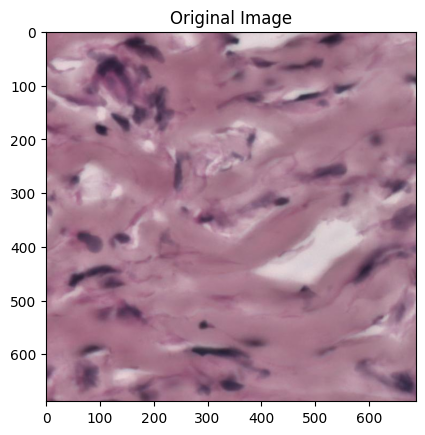

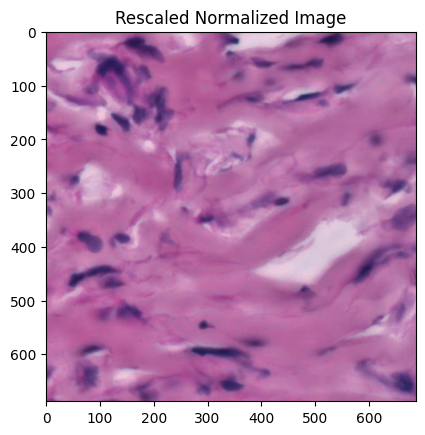

Deleted: temp/0_started_at_2025-01-21 15:20:38.972747_finished_at_2025-01-21 15:20:40.024380.txt


In [ ]:
import histomicstk
import os
import matplotlib.pyplot as plt
import subprocess
from PIL import Image
import numpy as np
#import girder_client
from skimage.transform import resize
from matplotlib import pylab as plt
from matplotlib.colors import ListedColormap
from histomicstk.preprocessing.color_normalization import reinhard
from histomicstk.saliency.tissue_detection import (
    get_slide_thumbnail, get_tissue_mask)
from histomicstk.annotations_and_masks.annotation_and_mask_utils import (
    get_image_from_htk_response)
from histomicstk.preprocessing.color_normalization.\
    deconvolution_based_normalization import deconvolution_based_normalization
from histomicstk.preprocessing.color_deconvolution.\
    color_deconvolution import color_deconvolution_routine, stain_unmixing_routine, rgb_separate_stains_macenko_pca
from histomicstk.preprocessing.augmentation.\
    color_augmentation import rgb_perturb_stain_concentration, perturb_stain_concentration
import datetime
    
starttime = datetime.datetime.now()
    
os.chdir("/disk2/user/gabgam/work/gigi_env/the_project/2_image_normalisation/")
print(os.getcwd())

# Set paths
#INPUT_FOLDER = "../1_tiling/outputs/satac_C1/tiling_output/v3_allspots/tiles_100/"  # Replace with the path to your folder containing images
INPUT_FOLDER = "temp"  # Replace with the path to your folder containing images
tiles_info = INPUT_FOLDER.split('/')

# ----------------------------------------------------
use_default_target = False   # True if you want to use the default values from function example, False for using the choosen target image 
normalisation_method = 'histomicsTK_macenko_nomasking'
# ----------------------------------------------------

# Setting up the paths using a personalised image as target
TARGET_IMAGE_PATH = "reference_images/reference_full.jpeg"
target_temp_path = "target_is_" + TARGET_IMAGE_PATH.split("/")[1].split(".")[0]
#output_folder = f"./output/{tiles_info[3]}/{tiles_info[5]}/{tiles_info[6]}/{normalisation_method}/{target_temp_path}"
output_folder = INPUT_FOLDER
print(output_folder)

# Compute target statistics from target image
target = Image.open(TARGET_IMAGE_PATH).convert("RGB")
im_target = np.array(target)
# I_0 = 255 # 240 is the default for brightfield images. Otherwise 255.
# W_target= rgb_separate_stains_macenko_pca(im_target, I_0)
# print(W_target)
#W_target = None

# Let's create the output folder files
os.makedirs(output_folder, exist_ok=True)

# File to log normalization failures
normalisation_fails_file = f"{output_folder}/0_failed_to_normalise.txt"


# Parameters for stain unmixing routine
stain_unmixing_routine_params = {
    'stains': ['hematoxylin', 'eosin'],
    'stain_unmixing_method': 'macenko_pca',
}

# File to log normalization failures
normalisation_fails_file = f"{output_folder}/0_failed_to_normalise_macenko.txt"

with open(normalisation_fails_file, "w") as file:
    file.write("The following tiles have failed normalization:\n")
    
    for filename in os.listdir(INPUT_FOLDER):
        if filename.endswith("um.jpg"):
            image_path = os.path.join(INPUT_FOLDER, filename)

            try:
                # Load image
                img = Image.open(image_path).convert("RGB")
                tissue_rgb = np.array(img)

                # Mask extraction without resizing because it's not a WSI, it's quite a small image
                # mask_out, _ = get_tissue_mask(tissue_rgb, #deconvolve_first=True,
                #     n_thresholding_steps=1, sigma=1.5, min_size=30)
                # mask_out = resize(mask_out == 0, output_shape=tissue_rgb.shape[:2],
                #      order=0, preserve_range=True) == 1
                
                # Perform Macenko normalization
                tissue_rgb_normalized = deconvolution_based_normalization(
                    tissue_rgb,
                    #W_target=W_target,
                    im_target = im_target,
                    stain_unmixing_routine_params=stain_unmixing_routine_params,
                    #mask_out = mask_out
                )
                
                # Clipping values that go out of range [0, 1]
                #tissue_rgb_normalized = np.clip(tissue_rgb_normalized, 0, 1)
                
                # Convert to PIL and save
                print(f"Normalized image min: {tissue_rgb_normalized.min()}, max: {tissue_rgb_normalized.max()}")
                img_normed_pil = Image.fromarray((tissue_rgb_normalized).astype('uint8')).convert("RGB")
                #output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_macenko_htk_normalised_nomasking.jpg")
                output_path = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(image_path))[0]}_{normalisation_method}.jpg")

                img_normed_pil.save(output_path)
                
                plt.imshow(tissue_rgb)
                plt.title("Original Image")
                plt.show()
                
                plt.imshow(tissue_rgb_normalized)
                plt.title("Rescaled Normalized Image")
                plt.show()
                
            except Exception as e:
                file.write(f"{filename}: {str(e)}\n")
                print(e)
            
# eventually deleting the previous time log file
for filename in os.listdir(output_folder):
    if filename.startswith("0_started_"):
        file_path = os.path.join(output_folder, filename)
        if os.path.isfile(file_path):  # Check if it is a file
            os.remove(file_path)      # Delete the file
            print(f"Deleted: {file_path}")

# saving the start and finish time in the file's name for simplicity in the reading.
with open(f"{output_folder}/0_started_at_{starttime}_finished_at_{datetime.datetime.now()}.txt", "w") as file:
    file.write(f"The run started at {starttime} and finished at {datetime.datetime.now()}.")



# reinhard with/without masking

/disk2/work/gabgam/gigi_env/the_project/2_image_normalisation
temp


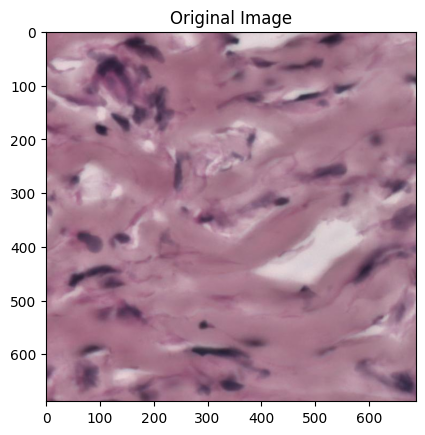

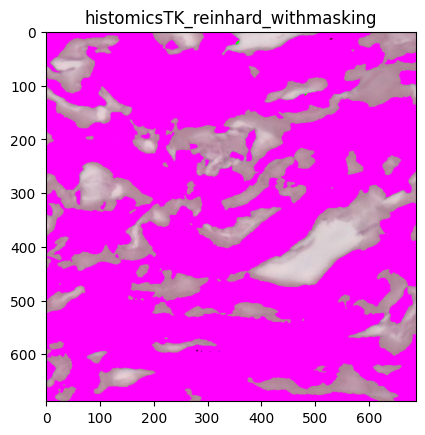

Deleted: temp/0_started_at_2025-01-21 15:58:00.712013_finished_at_2025-01-21 15:58:01.861113.txt


In [1]:
import histomicstk
import os
import matplotlib.pyplot as plt
import subprocess
from PIL import Image
import numpy as np
#import girder_client
from skimage.transform import resize
from matplotlib import pylab as plt
from matplotlib.colors import ListedColormap
from histomicstk.preprocessing.color_normalization import reinhard
from histomicstk.saliency.tissue_detection import (
    get_slide_thumbnail, get_tissue_mask)
from histomicstk.annotations_and_masks.annotation_and_mask_utils import (
    get_image_from_htk_response)
from histomicstk.preprocessing.color_normalization.\
    deconvolution_based_normalization import deconvolution_based_normalization
from histomicstk.preprocessing.color_deconvolution.\
    color_deconvolution import color_deconvolution_routine, stain_unmixing_routine
from histomicstk.preprocessing.augmentation.\
    color_augmentation import rgb_perturb_stain_concentration, perturb_stain_concentration
import datetime
    
starttime = datetime.datetime.now()
    
os.chdir("/disk2/user/gabgam/work/gigi_env/the_project/2_image_normalisation/")
print(os.getcwd())

# Set paths
INPUT_FOLDER = "temp"  # Replace with the path to your folder containing images
tiles_info = INPUT_FOLDER.split('/')

# ----------------------------------------------------
use_default_target = False   # True if you want to use the default values from function example, False for using the choosen target image 
normalisation_method = 'histomicsTK_reinhard_withmasking'
# normalisation_method = 'histomicsTK_reinhard_nomasking'
# ----------------------------------------------------


if use_default_target:
    # Setting up the paths for default target
    #output_folder = f"./output/{tiles_info[3]}/{tiles_info[5]}/{tiles_info[6]}/{normalisation_method}/target_is_default"
    output_folder = INPUT_FOLDER
    print(output_folder)
    
    # Using the target values from the function example
    # color norm. standard (from TCGA-A2-A3XS-DX1, Amgad et al, 2019)
    cnorm = {'mu': np.array([8.74108109, -0.12440419,  0.0444982]),
             'sigma': np.array([0.6135447, 0.10989545, 0.0286032]),}
    
else:
    # Setting up the paths using a personalised image as target
    TARGET_IMAGE_PATH = "reference_images/reference_full.jpeg"
    target_temp_path = "target_is_" + TARGET_IMAGE_PATH.split("/")[1].split(".")[0]
    #output_folder = f"./output/{tiles_info[3]}/{tiles_info[5]}/{tiles_info[6]}/{normalisation_method}/{target_temp_path}"
    output_folder = INPUT_FOLDER
    print(output_folder)
    
    # Compute target statistics from target image
    target = Image.open(TARGET_IMAGE_PATH).convert("RGB")
    target_array = np.array(target)
    cnorm = {'mu': target_array.mean(axis=(0, 1)),
             'sigma': target_array.std(axis=(0, 1)),}
    

# Let's create the output folder files
os.makedirs(output_folder, exist_ok=True)


# File to log normalization failures
normalisation_fails_file = f"{output_folder}/0_failed_to_normalise.txt"

with open(normalisation_fails_file, "w") as file:
    file.write("The following tiles have failed normalization:\n")
    
    for filename in os.listdir(INPUT_FOLDER):
        if filename.endswith("um.jpg"):
            image_path = os.path.join(INPUT_FOLDER, filename)

            try:
                # Load image
                img = Image.open(image_path).convert("RGB")
                tissue_rgb = np.array(img)
                
                # Mask extraction
                mask_out, _ = get_tissue_mask(tissue_rgb, #deconvolve_first=True,
                    n_thresholding_steps=1, sigma=1.5, min_size=30)
                mask_out = resize(mask_out == 0, output_shape=tissue_rgb.shape[:2],
                     order=0, preserve_range=True) == 1
                
                # Perform normalization
                tissue_rgb_normalized = reinhard(tissue_rgb, 
                                                 target_mu=cnorm['mu'], 
                                                 target_sigma=cnorm['sigma'],
                                                 mask_out = mask_out
                                                 )
                
                # Convert to PIL and save
                img_normed_pil = Image.fromarray(tissue_rgb_normalized.astype('uint8')).convert("RGB")
                output_path = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(image_path))[0]}_{normalisation_method}.jpg")
                img_normed_pil.save(output_path)
                
                plt.imshow(tissue_rgb)
                plt.title("Original Image")
                plt.show()
                
                plt.imshow(tissue_rgb_normalized)
                plt.title(f"{normalisation_method}")
                plt.show()
                
            except Exception as e:
                file.write(f"{filename}: {str(e)}\n")

# eventually deleting the previous time log file
for filename in os.listdir(output_folder):
    if filename.startswith("0_started_"):
        file_path = os.path.join(output_folder, filename)
        if os.path.isfile(file_path):  # Check if it is a file
            os.remove(file_path)      # Delete the file
            print(f"Deleted: {file_path}")

# saving the start and finish time in the file's name for simplicity in the reading.
with open(f"{output_folder}/0_started_at_{starttime}_finished_at_{datetime.datetime.now()}.txt", "w") as file:
    file.write(f"The run started at {starttime} and finished at {datetime.datetime.now()}.")



In [2]:
import histomicstk
import os
import matplotlib.pyplot as plt
import subprocess
from PIL import Image
import numpy as np
#import girder_client
from skimage.transform import resize
from matplotlib import pylab as plt
from matplotlib.colors import ListedColormap
from histomicstk.preprocessing.color_normalization import reinhard
from histomicstk.saliency.tissue_detection import (
    get_slide_thumbnail, get_tissue_mask)
from histomicstk.annotations_and_masks.annotation_and_mask_utils import (
    get_image_from_htk_response)
from histomicstk.preprocessing.color_normalization.\
    deconvolution_based_normalization import deconvolution_based_normalization
from histomicstk.preprocessing.color_deconvolution.\
    color_deconvolution import color_deconvolution_routine, stain_unmixing_routine
from histomicstk.preprocessing.augmentation.\
    color_augmentation import rgb_perturb_stain_concentration, perturb_stain_concentration
import datetime
    
starttime = datetime.datetime.now()
    
os.chdir("/disk2/user/gabgam/work/gigi_env/the_project/2_image_normalisation/")
print(os.getcwd())

# Set paths
INPUT_FOLDER = "../1_tiling/outputs/satac_C1/tiling_output/v3_allspots/tiles_100/"  # Replace with the path to your folder containing images
tiles_info = INPUT_FOLDER.split('/')

# ----------------------------------------------------
use_default_target = False   # True if you want to use the default values from function example, False for using the choosen target image 
normalisation_method = 'histomicsTK_reinhard_nomasking'
# ----------------------------------------------------


if use_default_target:
    # Setting up the paths for default target
    output_folder = f"./output/{tiles_info[3]}/{tiles_info[5]}/{tiles_info[6]}/{normalisation_method}/target_is_default"
    print(output_folder)
    
    # Using the target values from the function example
    # color norm. standard (from TCGA-A2-A3XS-DX1, Amgad et al, 2019)
    cnorm = {'mu': np.array([8.74108109, -0.12440419,  0.0444982]),
             'sigma': np.array([0.6135447, 0.10989545, 0.0286032]),}
    
else:
    # Setting up the paths using a personalised image as target
    TARGET_IMAGE_PATH = "reference_images/reference_full.jpeg"
    target_temp_path = "target_is_" + TARGET_IMAGE_PATH.split("/")[1].split(".")[0]
    output_folder = f"./output/{tiles_info[3]}/{tiles_info[5]}/{tiles_info[6]}/{normalisation_method}/{target_temp_path}"
    print(output_folder)
    
    # Compute target statistics from target image
    target = Image.open(TARGET_IMAGE_PATH).convert("RGB")
    target_array = np.array(target)
    cnorm = {'mu': target_array.mean(axis=(0, 1)),
             'sigma': target_array.std(axis=(0, 1)),}
    

# Let's create the output folder files
os.makedirs(output_folder, exist_ok=True)


# File to log normalization failures
normalisation_fails_file = f"{output_folder}/0_failed_to_normalise.txt"

with open(normalisation_fails_file, "w") as file:
    file.write("The following tiles have failed normalization:\n")
    
    for filename in os.listdir(INPUT_FOLDER):
        image_path = os.path.join(INPUT_FOLDER, filename)

        try:
            # Load image
            img = Image.open(image_path).convert("RGB")
            tissue_rgb = np.array(img)

            # Perform normalization
            tissue_rgb_normalized = reinhard(tissue_rgb, target_mu=cnorm['mu'], target_sigma=cnorm['sigma'])
            
            # Convert to PIL and save
            img_normed_pil = Image.fromarray(tissue_rgb_normalized.astype('uint8')).convert("RGB")
            output_path = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(image_path))[0]}_{normalisation_method}.jpg")
            img_normed_pil.save(output_path)
            
        except Exception as e:
            file.write(f"{filename}: {str(e)}\n")

# eventually deleting the previous time log file
for filename in os.listdir(output_folder):
    if filename.startswith("0_started_"):
        file_path = os.path.join(output_folder, filename)
        if os.path.isfile(file_path):  # Check if it is a file
            os.remove(file_path)      # Delete the file
            print(f"Deleted: {file_path}")

# saving the start and finish time in the file's name for simplicity in the reading.
with open(f"{output_folder}/0_started_at_{starttime}_finished_at_{datetime.datetime.now()}.txt", "w") as file:
    file.write(f"The run started at {starttime} and finished at {datetime.datetime.now()}.")



/disk2/work/gabgam/gigi_env/the_project/2_image_normalisation
./output/satac_C1/v3_allspots/tiles_100/histomicsTK_reinhard_nomasking/target_is_reference_full


/disk2/user/gabgam/miniconda3/envs/he_histomicstk_39/lib/python3.9/site-packages/histomicstk/preprocessing/color_conversion/lab_to_rgb.py:44: RuntimeWarning: overflow encountered in exp
  im_lms = np.exp(im_lms)
/disk2/user/gabgam/miniconda3/envs/he_histomicstk_39/lib/python3.9/site-packages/histomicstk/preprocessing/color_normalization/reinhard.py:110: RuntimeWarning: invalid value encountered in cast
  im_normalized = im_normalized.astype(np.uint8)


Deleted: ./output/satac_C1/v3_allspots/tiles_100/histomicsTK_reinhard_nomasking/target_is_reference_full/0_started_at_2025-01-22 09:48:27.370120_finished_at_2025-01-22 10:03:44.587799.txt
